### Klasifikasi Emnist Tulisan Tangan Menggunakan Ekstrasi Fitur HOG Dan SVM Dengan Perhitungan LOOVC 
#### Rizqi (4212201071)

#### import library 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from skimage.feature import hog
from mlxtend.plotting import plot_confusion_matrix


#### Pemanggilan dataset training dan test

In [2]:
train_data = pd.read_csv("D:/Python notebook/emnist-bymerge-train.csv", header=None)
test_data = pd.read_csv("D:/Python notebook/emnist-bymerge-test.csv", header=None)

#### Pemisahan data label dan konversi bilangan ke image

In [3]:
x_train = train_data.iloc[:, 1:].values.reshape(-1, 28, 28).astype('float32') #mengambil semua data kecuali kolom
y_train = train_data.iloc[:, 0].values.astype('int') #mengambil data label
x_test = test_data.iloc[:, 1:].values.reshape(-1, 28, 28).astype('float32')
y_test = test_data.iloc[:, 0].values.astype('int')

#### Mengambil 2000 sampel data training dan data test

In [4]:
max_samples = 2000
if len(x_train) > max_samples:
    x_train = x_train[:max_samples]
    y_train = y_train[:max_samples]

if len(x_test) > max_samples:
    x_test = x_test[:max_samples]
    y_test = y_test[:max_samples]

print("Jumlah data x_train :",x_train.shape[0])
print("Jumlah data x_test :",x_test.shape[0])

Jumlah data x_train : 2000
Jumlah data x_test : 2000


#### Ekstrasi data menggunakan metode HOG

In [6]:
def get_hog_features(param_images):
    temp_hog_features = []
    for image in param_images:
        get_hog = hog(image, 
                      orientations=9, 
                      pixels_per_cell=(6,6), 
                      cells_per_block=(2,2), 
                      block_norm='L2')
        temp_hog_features.append(get_hog)
    return temp_hog_features

x_train_hog = get_hog_features(x_train)
x_test_hog = get_hog_features(x_test)
print("Jumlah Hog feature pada x_train :", len(x_train_hog[0]))

Jumlah Hog feature pada x_train : 324


#### Standarisasi data fitur HOG

In [7]:
scaler = StandardScaler()
x_train_hog_scaled = scaler.fit_transform(x_train_hog)
x_test_hog_scaled = scaler.transform(x_test_hog)

#### Klasifikasi menggunakan SVM dan perhitungan menggunakan LOOVC

In [ ]:
loo = LeaveOneOut()
svm_model = svm.SVC(kernel='rbf', C=5, gamma='scale')
y_predict = cross_val_predict(svm_model, x_train_hog_scaled, y_train, cv=loo) #menggunakan metode loop cross_val_predict

loo_confusion_matriks = confusion_matrix(y_train, y_predict)
loo_accuracy = accuracy_score(y_train, y_predict)
loo_precision = precision_score(y_train, y_predict, average="weighted")
loo_recall = recall_score(y_train, y_predict, average="weighted")
loo_f1 = f1_score(y_train, y_predict, average="weighted")

print("\nHasil LOOCV setelah Training Data")
print("confusion_matrix")
print(loo_confusion_matriks)
print("Accuracy:",loo_accuracy)
print("Precision:",loo_precision)
print("Recall:",loo_recall)
print("F1 Score",loo_f1)


Hasil LOOCV setelah Training Data
confusion_matrix
[[ 61   0   1 ...   0   0   0]
 [  0 105   0 ...   0   0   0]
 [  0   0 112 ...   0   0   0]
 ...
 [  0   0   1 ...   0   0   0]
 [  0   0   0 ...   0  25   0]
 [  0   1   0 ...   0   1  41]]
Accuracy: 0.737
Precision: 0.7329093025822055
Recall: 0.737
F1 Score 0.7207565084714458


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### tampilkan confusion matrix untuk melihat hasil dari perhitungan LOOVC

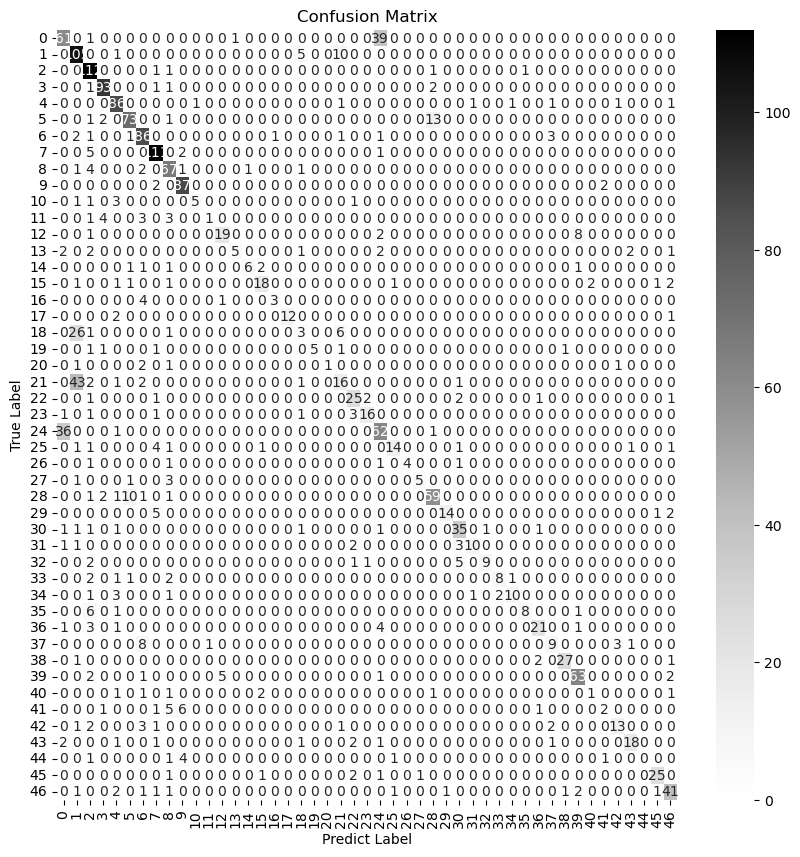

In [13]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(loo_confusion_matriks, annot=True, fmt='d', cmap='Greys', xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.xlabel("Predict Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()